## Assessing Climate Impacts on Maize Yield with a Process-based Model

#### Step 1: Read in simaultion output files
Choose your favorite location to analyze maize yield:
- Nebraska (Neb)
- Ohio (Ohi)
- Iowa (Iow)
- Oklahoma (Okl)

In [10]:
# Load in some useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Read in data files from your location of interest
ohi_control = pd.read_csv('data/Ohi_Control.csv', index_col='date', parse_dates=True)
ohi_temp = pd.read_csv('data/Ohi_Temp.csv', index_col='date', parse_dates=True)
ohi_vpd = pd.read_csv('data/Ohi_VPD.csv', index_col='date', parse_dates=True)
ohi_co2 = pd.read_csv('data/Ohi_CO2.csv', index_col='date', parse_dates=True)
ohi_all = pd.read_csv('data/Ohi_All.csv', index_col='date', parse_dates=True)

In [4]:
# Take a look at the data format of the simulation outputs
ohi_control.head()

,jday,time,Leaves,Dropped,LA/pl,LA_dead,LAI,RH,LeafWP,PFD,...,GrleafDM,DrpLfDM,stemDM,rootDM,SoilRt,MxRtDep,AvailW,solubleC,Note,Unnamed: 49
date,,,,,,,,,,,,,,,,,,,,,
2011-05-15,40618,0,0.0,0,0.0,0.0,0.0,98.7,-0.05,0.0,...,0.17,0.0,0.02,0.0,0.176,0.0,75.459,0.0,none,14.46
2011-05-15,40618,1,0.0,0,0.0,0.0,0.0,100.0,-0.05,0.0,...,0.17,0.0,0.02,0.0,0.176,195.4,75.210,0.0,none,14.46
2011-05-15,40618,2,0.0,0,0.0,0.0,0.0,100.0,-0.05,0.0,...,0.17,0.0,0.02,0.0,0.176,195.4,72.358,0.0,none,14.46
2011-05-15,40618,3,0.0,0,0.0,0.0,0.0,100.0,-0.05,0.0,...,0.17,0.0,0.02,0.0,0.176,195.4,70.891,0.0,none,14.46
2011-05-15,40618,4,0.0,0,0.0,0.0,0.0,100.0,-0.05,0.0,...,0.17,0.0,0.02,0.0,0.176,195.4,69.882,0.0,none,14.46


#### Step 2: Plot out some raw model outpus

Look at how biomass of different plant parts change throuhout the growing season

Text(2011-09-15, 155, 'shoot')

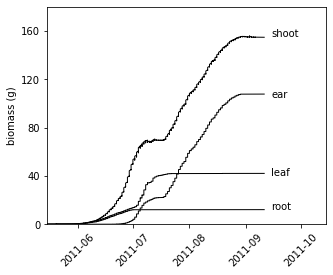

In [55]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(ohi_control.rootDM, color='black', linewidth=1)
ax.plot(ohi_control.shootDM, color='black', linewidth=1)
ax.plot(ohi_control.GrleafDM, color='black', linewidth=1)
ax.plot(ohi_control.earDM, color='black', linewidth=1)
ax.set(xlim=('2011-05-15', '2011-10-15'), ylim=(0,180))
ax.set_ylabel('biomass (g)')
ax.yaxis.set_ticks(np.arange(0,180,40))
ax.tick_params(axis='x', rotation=45)

plt.text('2011-09-15', 12, 'root')
plt.text('2011-09-15', 40, 'leaf')
plt.text('2011-09-15', 105, 'ear')
plt.text('2011-09-15', 155, 'shoot')


Look at how several morphological and physiological parameters change throughout the growing season

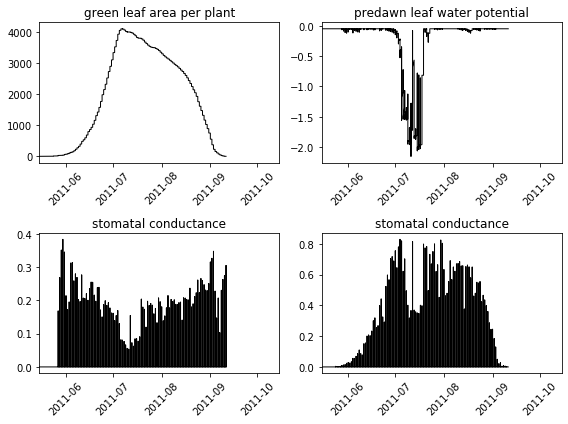

In [54]:
fig, axs = plt.subplots(2,2, figsize=(8,6), tight_layout=True)

axs[0,0].plot(ohi_control['LA/pl'], color='black', linewidth=1)
axs[0,0].set(xlim=('2011-05-15', '2011-10-15'))
axs[0,0].tick_params(axis='x', rotation=45)
axs[0,0].title.set_text('green leaf area per plant')

axs[0,1].plot(ohi_control.LeafWP, color='black', linewidth=1)
axs[0,1].set(xlim=('2011-05-15', '2011-10-15'))
axs[0,1].tick_params(axis='x', rotation=45)
axs[0,1].title.set_text('predawn leaf water potential')

axs[1,0].plot(ohi_control.av_gs, color='black', linewidth=1)
axs[1,0].set(xlim=('2011-05-15', '2011-10-15'))
axs[1,0].tick_params(axis='x', rotation=45)
axs[1,0].title.set_text('stomatal conductance')

axs[1,1].plot(ohi_control.Pn, color='black', linewidth=1)
axs[1,1].set(xlim=('2011-05-15', '2011-10-15'))
axs[1,1].tick_params(axis='x', rotation=45)
axs[1,1].title.set_text('stomatal conductance')


#### Step 3: Take a finer look at the model outputs
There are several ways you can further process the model outputs. <br> 
For some outputs, further process is necessary since the hourly model output can be very noisy. <br>
Averaging is a simple way to make sense of these kind of outptus. Here are a couple options:
- Take a daily mean
- Take a monthly mean
- Take the mean across the whole growing season
- Average over a specific phenological stage. 

The model output keeps track of the developmental stages in the last column titled "Notes". <br> 
The different stages include:
    - Emerged
    - Tasselinit (tassel initiaiton)
    - Silked
    - Grainfill (grain filling)
    - Maturation
    
Summing values over a period of time (daily, monthly, growing season, developmental stage) is also a good option for certain outputs. Sometime, looking at a certain time in the day can be useful as well. For example, analyzing leaf water potential outptus at 5am as a rough estimate of "predawn leaf water potential"

#### Bonus: Further exploration 
There are so many ways you can explore these model outputs. <br> 
Linking related model outputs together, comparing values throuhout different developmental stages, <br>
comparing between simulation sites, looking into interaction terms etc. 
Get creative, and have fun with the data!